# 18.063 Pset 2

### Problem 2
#### 1. 
$$ g(x, p) = \begin{pmatrix} p_1 x_1^2 - x_2 \\ x_1 x_2 - p_2 x_2 + p_3 \end{pmatrix} $$
$$ dg = \frac{\partial g}{\partial x} dx + \frac{\partial g}{\partial p} dp = \begin{pmatrix} \frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2} \\ \frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} \end{pmatrix} \begin{pmatrix} dx_1 \\ dx_2 \end{pmatrix} + \begin{pmatrix} \frac{\partial g_1}{\partial p_1} & \frac{\partial g_1}{\partial p_2} & \frac{\partial g_1}{\partial p_3}\\ \frac{\partial g_2}{\partial p_1} & \frac{\partial g_2}{\partial p_2} & \frac{\partial g_2}{\partial p_3} \end{pmatrix} \begin{pmatrix} dp_1 \\ dp_2 \\ dp_3 \end{pmatrix}$$
$$ \frac{\partial g}{\partial x} = \begin{pmatrix} 2 p_1 x_1 & -1 \\ x_2 & x_1 - p_2 \end{pmatrix} \rightarrow \frac{\partial g}{\partial p} = \begin{pmatrix} x_1^2 & 0 & 0 \\ 0 & -x_2 & 1 \end{pmatrix} $$
#### 2. 
$$ x := x - \frac{g(x)}{g'(x)} = x - (\frac{\partial g}{\partial x})^{-1}f(x) $$

In [81]:
using LinearAlgebra

function g(x, p)
    return [p[1]*x[1]^2 - x[2]; x[1]*x[2] - p[2]*x[2] + p[3]]
end

function dgdx(x, p) 
    return [2*p[1]*x[1] -1; x[2] x[1]-p[2]]
end

p = [1, 2, 1]
x = [1.2, 1.3]
steps = 0

while norm(g(x, p)) > 1e-12
    x = x - inv(dgdx(x, p)) * g(x, p)
    steps += 1
end 

println("x: ", x)
println("steps: ", steps)

x: [1.0, 1.0]
steps: 5


#### 3. 
$$ f(p) = ||x(p)|| \rightarrow \nabla _p f(p) = \frac{df}{dx} \frac{dx}{dp} $$
$$ \nabla f = \frac{x}{||x||} \rightarrow \frac{df}{dx} = (\nabla f)^T = \frac{x^T}{||x||} $$
$$ g(x,p) = 0 \rightarrow dg = \frac{\partial g}{\partial x} dx + \frac{\partial g}{\partial p} dp = 0 \rightarrow dx = -(\frac{\partial g}{\partial x})^{-1} \frac{\partial g}{\partial p} dp $$
$$ \frac{dx}{dp} = -\begin{pmatrix} 2 p_1 x_1 & -1 \\ x_2 & x_1 - p_2 \end{pmatrix}^{-1} \begin{pmatrix} x_1^2 & 0 & 0 \\ 0 & -x_2 & 1 \end{pmatrix} $$
$$ \nabla _p f(p) = - \frac{x^T}{||x||} \begin{pmatrix} 2 p_1 x_1 & -1 \\ x_2 & x_1 - p_2 \end{pmatrix}^{-1} \begin{pmatrix} x_1^2 & 0 & 0 \\ 0 & -x_2 & 1 \end{pmatrix} $$

In [2]:
using LinearAlgebra

function g(x, p)
    return [p[1]*x[1]^2 - x[2]; x[1]*x[2] - p[2]*x[2] + p[3]]
end

function dgdx(x, p) 
    return [2*p[1]*x[1] -1; x[2] x[1]-p[2]]
end

function dgdp(x, p)
    return [x[1]^2 0 0; 0 -x[1] 1]
end

function f(p)
    return norm(x)
end

p = [1, 2, 1]
x = [1, 1]
δp = randn(3) * 1E-8
p += δp

while norm(g(x,p)) > 1e-10
    x = x - inv(dgdx(x, p)) * g(x, p)
end 

δf = f(p) - norm([1, 1]) # f(p + δp) - f(p)
∇f = - x'/norm(x) * inv(dgdx(x,p)) * dgdp(x,p)

LHS = dot((∇f)', δp)
RHS = δf

println("x(p): ", x)
println("(∇f)'δp: ", LHS)
println("δf: ", RHS)

x(p): [1.0000000196014145, 1.0000000444691235]
(∇f)'δp: 4.5304714796262516e-8
δf: 4.530471175989703e-8


### Problem 3
$$ g(\lambda, A) = 0 \rightarrow dg = \frac{\partial g}{\partial \lambda} d\lambda + \langle \frac{\partial g}{\partial A}, dA \rangle = \frac{\partial g}{\partial \lambda} \langle \nabla _A \lambda , dA \rangle + \langle \frac{\partial g}{\partial A}, dA \rangle $$
$$ B = A - \lambda I \rightarrow g(B) = det(B) \rightarrow \frac{\partial g}{\partial A} = \frac{\partial g}{\partial B} \frac{\partial B}{\partial A} \rightarrow \frac{\partial g}{\partial \lambda} = \langle \frac{\partial g}{\partial B} , \frac{\partial B}{\partial \lambda} \rangle $$
This is because $ dg $ is a scalar, meaning $ \frac{\partial g}{\partial A} [dA] $ must be a scalar, making the operation a Frobenius inner product. The same applies for $ \frac{\partial g}{\partial \lambda} = \frac{\partial g}{\partial B} [\frac{\partial B}{\partial \lambda}] $, which must be a scalar, meaning the operation must also be an inner product. We may also note that as $ \frac{\partial g}{\partial \lambda} $ is a scalar we may freely divide it into the inner product for $ \frac{\partial g}{\partial A} [dA] $. 
$$ \langle \frac{\partial g}{\partial B} , \frac{\partial B}{\partial \lambda} \rangle \langle \nabla _k \lambda , dA \rangle + \langle \frac{\partial g}{\partial B} \frac{\partial B}{\partial A} , dA \rangle = 0 \rightarrow \langle \nabla _A \lambda , dA \rangle = - \langle \frac{\frac{\partial g}{\partial B} \frac{\partial B}{\partial A}}{\langle \frac{\partial g}{\partial B} , \frac{\partial B}{\partial \lambda} \rangle} , dA \rangle \rightarrow \nabla _A \lambda = - \frac{\frac{\partial g}{\partial B} \frac{\partial B}{\partial A}}{\langle \frac{\partial g}{\partial B} , \frac{\partial B}{\partial \lambda} \rangle} $$
$$ \frac{\partial g}{\partial B} = (adj(B))^T \rightarrow \frac{\partial B}{\partial A} = I \rightarrow \frac{\partial B}{\partial \lambda} = -I $$
$$ \frac{\partial g}{\partial B} \frac{\partial B}{\partial A} = (adj(B))^T = (adj(A - \lambda I))^T = adj(A - \lambda I) $$
$$ \langle \frac{\partial g}{\partial B} , \frac{\partial B}{\partial \lambda} \rangle = - tr(adj(B)) = - tr(adj(A - \lambda I)) $$
$$ q_k^Tq_k = 1 \rightarrow QQ^T = I \rightarrow Q^{-1} = Q^T \rightarrow A = Q \Lambda Q^T \rightarrow -\lambda I = Q(-\lambda I)Q^T \rightarrow A - \lambda I = Q(\Lambda - \lambda I)Q^T $$
$$ adj(A - \lambda I) = Q(adj(\Lambda - \lambda I))Q^T = Q adj(\begin{pmatrix} \lambda _1 & & \\  & \ddots & \\ & & \lambda _k \end{pmatrix} - \begin{pmatrix} \lambda & & \\  & \ddots & \\ & & \lambda \end{pmatrix}) Q^T = Q adj(\begin{pmatrix} \lambda _1 - \lambda & & \\  & \ddots & \\ & & \lambda _k - \lambda \end{pmatrix}) Q^T $$
$$ \lim _{\lambda \rightarrow \lambda _k} adj(A - \lambda I) =  [q_1 \cdots q_k] adj(\begin{pmatrix} \lambda _1 - \lambda _k & & \\ & \ddots & \\ & & \lambda _k - \lambda _k = 0 \end{pmatrix}) [q_1 \cdots q_k]^T $$
$$ = [q_1 \cdots q_k] \begin{pmatrix} 0 & & \\ & \ddots & \\ & & \Pi _{j \neq k} (\lambda _j - \lambda _k) \end{pmatrix} = [q_1 \cdots q_k]^T = q_k\Pi _{j \neq k} (\lambda _j - \lambda _k)q_k^T = L_kq_kq_k^T $$
$$ \nabla _A \lambda _k = - \frac{\frac{\partial g}{\partial B} \frac{\partial B}{\partial A}}{\langle \frac{\partial g}{\partial B} , \frac{\partial B}{\partial \lambda} \rangle} = \frac{adj(A - \lambda _k I)}{tr(adj(A - \lambda _k I))} = \frac{L_k q_k q_k^T}{tr(L_k q_k q_k^T)} = \frac{L_k q_k q_k^T}{L_k tr(q_k q_k^T)} = q_kq_k^T $$

### Problem 4
#### 1. 
$$ \frac{\partial u}{\partial t} = f(u, L_1, L_2, t) \rightarrow J_1 = \frac{\partial u}{\partial L_1} \rightarrow J_2 = \frac{\partial u}{\partial L_2} $$
$$ \frac{\partial J_1}{\partial t} = \frac{\partial f}{\partial u} J_1 + \frac{\partial f}{\partial L_1} \rightarrow \frac{\partial J_2}{\partial t} = \frac{\partial f}{\partial u} J_2 + \frac{\partial f}{\partial L_2} $$
$$ \frac{\partial}{\partial t} \begin{pmatrix} u \\ J_1 \\ J_2 \end{pmatrix} = \begin{pmatrix} f(u, L_1, L_2, t) \\ \frac{\partial f}{\partial u} J_1 + \frac{\partial f}{\partial L_1} \\ \frac{\partial f}{\partial u} J_2 + \frac{\partial f}{\partial L_2} \end{pmatrix} = F(u, J_1, J_2, t) $$
#### 2. 

In [3]:
using DifferentialEquations, Plots, ForwardDiff, StaticArrays, LaTeXStrings, LinearAlgebra

function doublependulum(u, params, t)
    g = 9.80665 # Earth gravity (m/s²)
    (; l1, l2, m1, m2) = params

    Δθ = u[1] - u[2]
    M = @SMatrix[l1*(m1+m2)   m2*l2*cos(Δθ)
                 l1*cos(Δθ)   l2]
    rhs = @SVector[-m2*l2*u[4]^2*sin(Δθ) - g*(m1+m2)*sin(u[1]),
                   l1*u[3]^2*sin(Δθ) - g*sin(u[2])]
    θ̈ = M \ rhs
    u̇ = @SVector[u[3], u[4], θ̈[1], θ̈[2]]
    return u̇
end

tspan = (0, 10);
p = (; l1=1, l2=1, m1=0.1, m2=0.1)

(l1 = 1, l2 = 1, m1 = 0.1, m2 = 0.1)

In [4]:
function doublependulum_∂L(uJ, params, t)
    u = SVector(ntuple(i -> uJ[i], Val(4)))
    J1 = SVector(ntuple(i -> uJ[i + 4], Val(4)))
    J2 = SVector(ntuple(i -> uJ[i + 8], Val(4)))
    
    u̇ = doublependulum(u, params, t)
    ∂f∂u = ForwardDiff.jacobian(u -> doublependulum(u, params, t), u)
    ∂f∂L1 = ForwardDiff.jacobian(l -> doublependulum(u, (; l1=l[1], l2=params.l2, m1=params.m1, m2=params.m2), t), @SVector[params.l1])
    ∂f∂L2 = ForwardDiff.jacobian(l -> doublependulum(u, (; l1=params.l1, l2=l[1], m1=params.m1, m2=params.m2), t), @SVector[params.l2])

    J̇1 = ∂f∂u * J1 + ∂f∂L1[:, 1]
    J̇2 = ∂f∂u * J2 + ∂f∂L2[:, 1]
    return [u̇; vec(J̇1); vec(J̇2)]
end

doublependulum_∂L (generic function with 1 method)

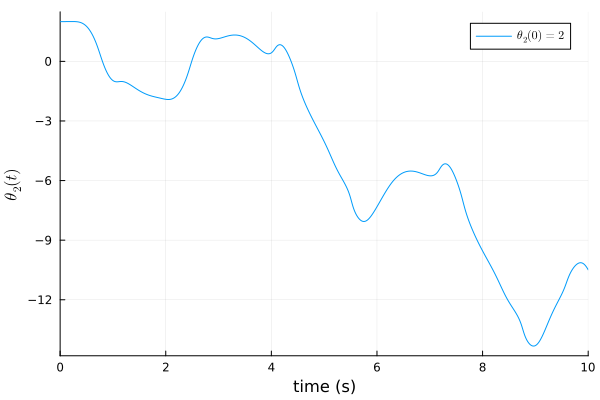

In [5]:
LI = @SMatrix[1 0 0 0; 0 1 0 0]

prob1 = ODEProblem(doublependulum, @SVector[2, 2.0, 0, 0], tspan, p)
sol1 = solve(prob1, reltol = 1e-10)

prob_diff = ODEProblem(doublependulum_∂L, [@SVector[2, 2.0, 0, 0]; vec(LI)], tspan, p)
sol_diff = solve(prob_diff, reltol = 1e-10)

plot(sol_diff, idxs=2, label=L"\theta_2(0) = 2")
plot!(xlabel="time (s)", ylabel=L"\theta_2(t)")

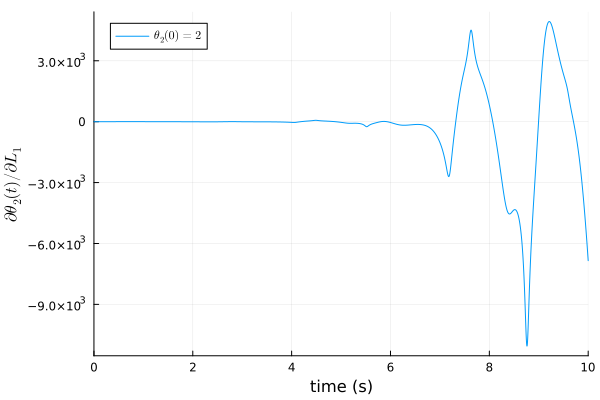

In [12]:
plot(sol_diff, idxs=6, label=L"\theta_2(0) = 2")
plot!(xlabel="time (s)", ylabel=L"\partial\theta_2(t)/\partial L_1")

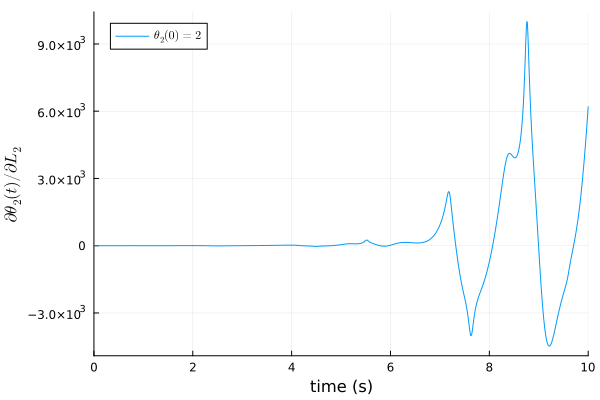

In [7]:
plot(sol_diff, idxs=10, label=L"\theta_2(0) = 2")
plot!(xlabel="time (s)", ylabel=L"\partial\theta_2(t)/\partial L_2")

#### 3. 

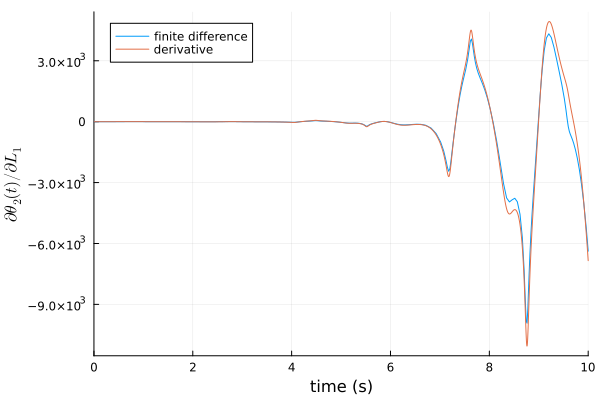

In [8]:
prob1_delta = ODEProblem(doublependulum, @SVector[2, 2, 0, 0], tspan, (; l1=1 + 1E-5, l2=1, m1=0.1, m2=0.1))
sol1_delta = solve(prob1_delta, reltol = 1e-10)

dθ₂ = sol1_delta(sol1.t)[2,:] - sol1[2,:]
plot(sol1.t, dθ₂ / 1e-5, label="finite difference")
plot!(sol_diff, idxs=6, label="derivative")
plot!(xlabel="time (s)", ylabel=L"\partial\theta_2(t)/\partial L_1")

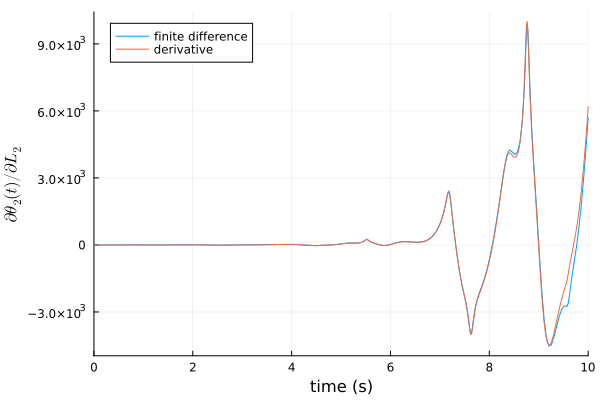

In [9]:
# trying for ∂θ₂/∂L₂ as well, for some reason the curve has the exact same shape as ∂θ₂/∂θ₂(0)
# but it matches the finite difference (?)
prob1_delta = ODEProblem(doublependulum, @SVector[2, 2, 0, 0], tspan, (; l1=1, l2=1 + 1E-5, m1=0.1, m2=0.1))
sol1_delta = solve(prob1_delta, reltol = 1e-10)

dθ₂ = sol1_delta(sol1.t)[2,:] - sol1[2,:]
plot(sol1.t, dθ₂ / 1e-5, label="finite difference")
plot!(sol_diff, idxs=10, label="derivative")
plot!(xlabel="time (s)", ylabel=L"\partial\theta_2(t)/\partial L_2")

### Problem 5
<div>
    <img src=https://media.discordapp.net/attachments/1049173823615926324/1334859470521761883/IMG_0004.png?ex=679e1042&is=679cbec2&hm=c53abdb9afd78aa679690336eae4c031a0623aa915803c36cd5721c445356489&=&format=webp&quality=lossless&width=1440&height=652 width="700">
</div>

I am going to use $ \frac{\partial a}{\partial b} = a_b $ notation, as I keep getting lost while trying to write out the chains in LaTeX. 
$$ f(x, y, z) : x, y, z \in \mathbb{R}^n \rightarrow w \in \mathbb{R}^n $$
$$ a = (x^Ty) * z \rightarrow a_x = yz^T, a_y = xz^T, a_z = x^TyI $$
$$ b = \sin .(a) + x .* \exp.(z) \rightarrow b_x = I \exp.(z), b_a = (\cos.(a))I, b_z = I(x.*\exp.(z)) $$
$$ c = \log.(b) \rightarrow c_b = I(x .* \ln(10))^{.-1} $$
$$ d = (b^Tb) b \rightarrow d_b = 2bb^T + b^TbI $$
$$ e = b \rightarrow e_b = I $$
$$ w = e * \sin(c'd) \rightarrow w_c = e\cos(c^Td)d^T, w_d = e\cos(c^Td)c^T, w_e = \sin(c^Td)I $$
Forward Mode: 
$$ f_{xF} = w_ee_bb_aa_x + w_dd_bb_aa_x + w_cc_bb_aa_x + w_ee_bb_x + w_dd_bb_x + w_cc_bb_x $$
$$ f_{yF} = w_ee_bb_aa_y+w_dd_bb_aa_y + w_cc_bb_aa_y $$
$$ f_{zF} = w_ee_bb_aa_z + w_dd_bb_aa_z + w_cc_bb_aa_z + w_ee_bb_z + w_dd_bb_z + w_cc_bb_z $$
$$ J_F = [f_{xF}, f_{yF}, f_{zF}] $$
Reverse Mode: 
$$ w_b = w_ee_b + w_dd_b + w_cc_b $$
$$ f_{xR} = w_b(b_x + b_aa_x) $$
$$ f_{yR} = w_bb_aa_y $$
$$ f_{zR} = w_b(b_z + b_aa_z) $$
$$ J_F = [f_{xR}, f_{yR}, f_{zR}] $$
Reverse mode requires significantly less calculations, as $ w_b $ is calculated once and distributed across the Jacobian, and so reverse mode is significantly faster for this program. 

### Problem 6
#### 1. 
#### a. 
$$ \langle X, f'(A)[Y] \rangle = trace(X^T \sum _{k=0}^{n-1} (A^k Y A^{n-1-k})) = trace(\sum _{k=0}^{n-1} A^{n-1-k} X^T \sum _{k=0}^{n-1} A^k Y) $$
$$ = trace(\sum _{k=0}^{n-1} (A^{n-1-k} X^T A^k) Y) = trace(\sum _{k=0}^{n-1} (A^{kT} X A^{(n-1-k)T})^T Y) = \langle f'(A^T)[X], Y \rangle $$
#### b. 
$$ \langle X, f'(A)[Y] \rangle = trace(X^T(-A^{-1}YA^{-1})) = trace(-A^{-1}X^TA^{-1}Y) = trace((-A^{-T}XA^{-T})Y) = \langle f'(A^T)[X], Y \rangle $$
#### 2. 
#### a. 
$$ B = A + \exp(A) \rightarrow f(B) = \det(B) $$ 
$$ f'(B)[dB] = tr(\det(B)B^{-1}dB) \rightarrow dB = I + \exp'(A)[dA] = I + \exp(A + dA) $$
$$ f'(A)[dA] = tr(\det(A + \exp(A))(A + \exp(A))^{-1}(I + \exp(A + dA))) $$
#### b. 
